In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Нахождение параметра сдвига распределения Коши

In [3]:
cauchy_txt = open('cauchy.txt')
sample_c = np.array([float(line) for line in cauchy_txt])

Оценим параметр сдвига методом максимального правдоподобия по <b>половине</b> выборки.

In [4]:
#время работы ~40с
N = sample_c.size
MLE_arr = np.array([np.sum(sps.cauchy.logpdf(sample_c[:N/2], loc=i, scale=1)) for i in np.arange(-1000, 1000, 0.01)])

In [7]:
m = round(0.01*np.argmax(MLE_arr) - 1000, 2)
print "Параметр равен", m 

Параметр равен -355.18


In [8]:
#Время работы ~45c
N = sample_c.size
MLE_arr = np.array([np.sum(sps.cauchy.logpdf(sample_c, loc=i, scale=1)) for i in np.arange(-1000, 1000, 0.01)])

Оценим теперь параметр сдвига методом максимального правдоподобия по <b>всей</b> выборке.

In [9]:
m = round(0.01*np.argmax(MLE_arr) - 1000, 2)
print "Параметр равен", m, "."

Параметр равен -355.18 .


Получили такую же оценку параметра сдвига.

Сравним эмпирическую функцию распределения с функцией распределения с полученным параметром сдвига.

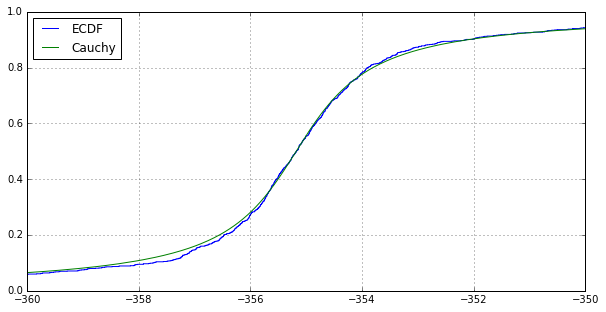

In [12]:
ecdf_c  = ECDF(sample_c)
figure(figsize(10, 5))
plt.step(ecdf_c.x, ecdf_c.y, label='ECDF')
plot(ecdf_c.x, sps.cauchy.cdf(ecdf_c.x, loc=m, scale=1) , label='Cauchy')
plt.xlim(-360, -350)
plt.grid()
plt.legend(loc=2)
plt.show()

# Определение методом максимального правдоподобия коэффициента формы распределения Вейбулла. 

In [13]:
weibull_txt = open('weibull.txt')
sample_w = np.array([float(line) for line in weibull_txt])

In [14]:
N = 365*4 + 1
MLE_arr_w_4y = np.array([np.sum(sps.weibull_min.logpdf(sample_w[:N], c=i)) for i in (10 ** np.arange(-2, 2, 0.001))])

In [15]:
w_4y = round(10 ** (np.argmax(MLE_arr_w_4y)*0.001 - 2))
print "Параметр равен", w_4y

Параметр равен 26.0


In [16]:
N = sample_w.size
MLE_arr_w = np.array([np.sum(sps.weibull_min.logpdf(sample_w, c=i)) for i in (10 ** np.arange(-2, 2, 0.001))])

In [17]:
w = round(10 ** (np.argmax(MLE_arr_w)*0.001 - 2))
print "Параметр равен", w

Параметр равен 26.0


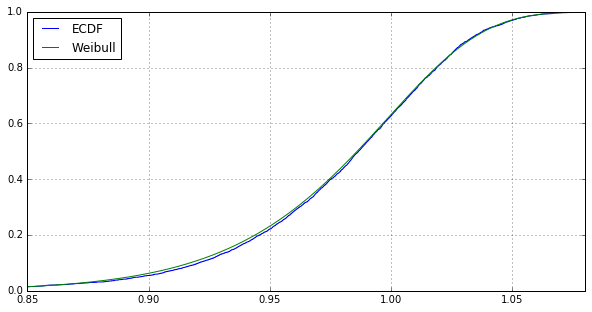

In [20]:
ecdf_w = ECDF(sample_w)
figure(figsize(10, 5))
plt.step(ecdf_w.x, ecdf_w.y, label='ECDF')
plot(ecdf_w.x, sps.weibull_min.cdf(ecdf_w.x, c=w), label='Weibull')
plt.xlim(0.85, 1.08)
plt.grid()
plt.legend(loc=2)
plt.show()

### Вывод:

Из построенных графиков видим, что методом максимального правдоподобия можно весьма точно оценить параметры распределений.